Converged in 130 epochs.


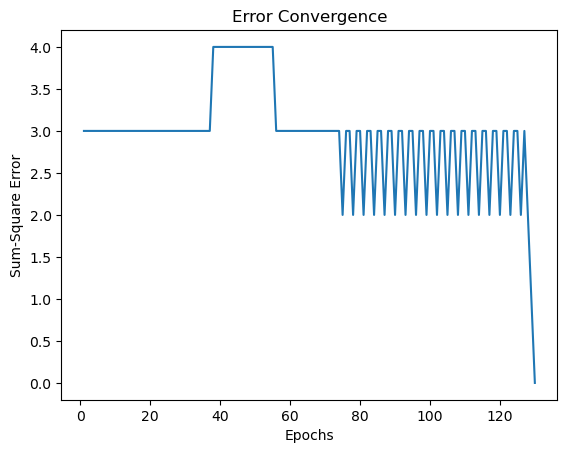

Final Weights: [-0.1   0.1   0.05]


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the AND gate training data
# Input data (X) and corresponding target labels (Y)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([0, 0, 0, 1])

# Initialize weights and bias
W = np.array([10, 0.2, -0.75])  # Initial weights, including bias
learning_rate = 0.05
epochs = 1000  # Maximum number of epochs
errors = []  # To store the sum-square-error for each epoch

# Step activation function
def step(x):
    return 1 if x > 0 else 0

# Training the perceptron
for epoch in range(epochs):
    error_sum = 0
    for i in range(len(X)):
        # Calculate the predicted output (Y_pred) using the current weights
        Y_pred = step(np.dot(X[i], W[1:]) + W[0])  # Adding bias term
        
        # Calculate the error
        error = Y[i] - Y_pred
        error_sum += error ** 2
        
        # Update weights
        W[1:] += learning_rate * error * X[i]
        W[0] += learning_rate * error  # Update bias
    
    errors.append(error_sum)

    # If the error is zero, the perceptron has learned successfully
    if error_sum == 0:
        print(f"Converged in {epoch + 1} epochs.")
        break

# Plotting the error values
plt.plot(range(1, len(errors) + 1), errors)
plt.xlabel('Epochs')
plt.ylabel('Sum-Square Error')
plt.title('Error Convergence')
plt.show()

# Print the final weights
print("Final Weights:", W)


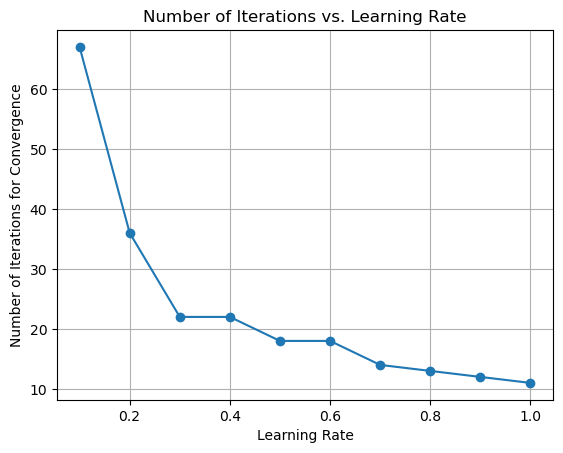

Learning Rate 0.1: 67 iterations
Learning Rate 0.2: 36 iterations
Learning Rate 0.3: 22 iterations
Learning Rate 0.4: 22 iterations
Learning Rate 0.5: 18 iterations
Learning Rate 0.6: 18 iterations
Learning Rate 0.7: 14 iterations
Learning Rate 0.8: 13 iterations
Learning Rate 0.9: 12 iterations
Learning Rate 1: 11 iterations


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Step activation function
def step_activation(x):
    return 1 if x >= 0 else 0

# AND gate training data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])

# Initial weights
initial_weights = np.array([10, 0.2, -0.75])

# List of learning rates to test
learning_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

# Dictionary to store the number of iterations for each learning rate
iterations_required = {}

for learning_rate in learning_rates:
    # Clone initial weights for each learning rate
    W = np.copy(initial_weights)
    
    # Counter for the number of iterations
    iterations = 0
    
    while True:
        error = 0
        for i in range(len(X)):
            # Calculate the weighted sum
            weighted_sum = np.dot(W[1:], X[i]) + W[0]
            
            # Apply the step activation function
            output = step_activation(weighted_sum)
            
            # Calculate the error
            delta = y[i] - output
            
            # Update weights
            W[1:] += learning_rate * delta * X[i]
            W[0] += learning_rate * delta
            
            # Update error
            error += delta ** 2
        
        # Check for convergence
        if error == 0:
            break
        
        iterations += 1
    
    iterations_required[learning_rate] = iterations

# Plot the number of iterations vs. learning rates
plt.plot(learning_rates, [iterations_required[lr] for lr in learning_rates], marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('Number of Iterations for Convergence')
plt.title('Number of Iterations vs. Learning Rate')
plt.grid(True)
plt.show()

# Print the number of iterations for each learning rate
for learning_rate, num_iterations in iterations_required.items():
    print(f"Learning Rate {learning_rate}: {num_iterations} iterations")


Converged with ReLU after 390 epochs


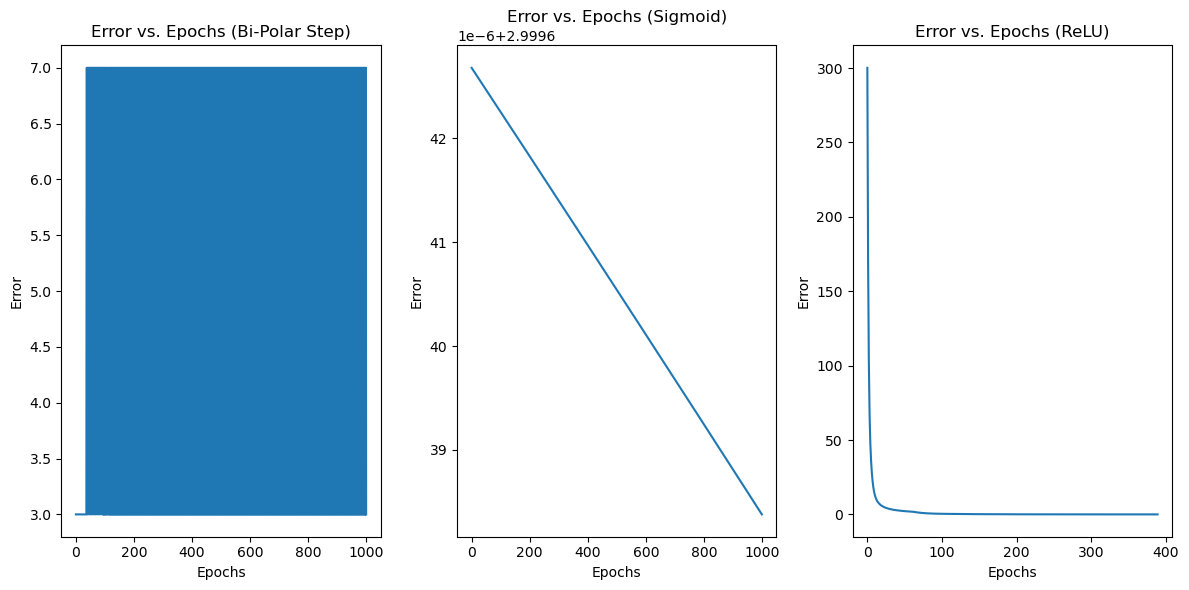

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the training data for the AND gate
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([0, 0, 0, 1])

# Initialize weights and bias
W = np.array([10, 0.2, -0.75])  # W0, W1, W2
learning_rate = 0.05
epochs = 1000

# Initialize lists to store errors and epoch numbers for each activation function
errors_bipolar_step = []
epoch_numbers_bipolar_step = []
errors_sigmoid = []
epoch_numbers_sigmoid = []
errors_relu = []
epoch_numbers_relu = []

# Define the Bi-Polar Step activation function
def bipolar_step_activation(x):
    return 1 if x >= 0 else -1

# Define the Sigmoid activation function
def sigmoid_activation(x):
    return 1 / (1 + np.exp(-x))

# Define the ReLU activation function
def relu_activation(x):
    return max(0, x)

# Training the perceptron with Bi-Polar Step activation
for epoch in range(epochs):
    error = 0
    for i in range(len(X)):
        # Calculate the weighted sum
        weighted_sum = np.dot(X[i], W[1:]) + W[0]

        # Apply the Bi-Polar Step activation function
        prediction = bipolar_step_activation(weighted_sum)

        # Calculate the error
        error = error + (Y[i] - prediction) ** 2

        # Update weights
        W[1:] = W[1:] + learning_rate * (Y[i] - prediction) * X[i]
        W[0] = W[0] + learning_rate * (Y[i] - prediction)

    # Append error and epoch number for plotting
    errors_bipolar_step.append(error)
    epoch_numbers_bipolar_step.append(epoch)

    # Check for convergence
    if error <= 0.002:
        print(f"Converged with Bi-Polar Step after {epoch + 1} epochs")
        break

# Reinitialize weights for Sigmoid and ReLU activation
W = np.array([10, 0.2, -0.75])  # Reset weights

# Training the perceptron with Sigmoid activation
for epoch in range(epochs):
    error = 0
    for i in range(len(X)):
        # Calculate the weighted sum
        weighted_sum = np.dot(X[i], W[1:]) + W[0]

        # Apply the Sigmoid activation function
        prediction = sigmoid_activation(weighted_sum)

        # Calculate the error
        error = error + (Y[i] - prediction) ** 2

        # Update weights
        delta = learning_rate * (Y[i] - prediction) * prediction * (1 - prediction)
        W[1:] = W[1:] + delta * X[i]
        W[0] = W[0] + delta

    # Append error and epoch number for plotting
    errors_sigmoid.append(error)
    epoch_numbers_sigmoid.append(epoch)

    # Check for convergence
    if error <= 0.002:
        print(f"Converged with Sigmoid after {epoch + 1} epochs")
        break

# Reinitialize weights for ReLU activation
W = np.array([10, 0.2, -0.75])  # Reset weights

# Training the perceptron with ReLU activation
for epoch in range(epochs):
    error = 0
    for i in range(len(X)):
        # Calculate the weighted sum
        weighted_sum = np.dot(X[i], W[1:]) + W[0]

        # Apply the ReLU activation function
        prediction = relu_activation(weighted_sum)

        # Calculate the error
        error = error + (Y[i] - prediction) ** 2

        # Update weights
        delta = learning_rate * (Y[i] - prediction)
        W[1:] = W[1:] + delta * X[i]
        W[0] = W[0] + delta

    # Append error and epoch number for plotting
    errors_relu.append(error)
    epoch_numbers_relu.append(epoch)

    # Check for convergence
    if error <= 0.002:
        print(f"Converged with ReLU after {epoch + 1} epochs")
        break

# Plotting error vs. epoch for all activation functions
plt.figure(figsize=(12, 6))
plt.subplot(131)
plt.plot(epoch_numbers_bipolar_step, errors_bipolar_step)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Error vs. Epochs (Bi-Polar Step)')

plt.subplot(132)
plt.plot(epoch_numbers_sigmoid, errors_sigmoid)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Error vs. Epochs (Sigmoid)')

plt.subplot(133)
plt.plot(epoch_numbers_relu, errors_relu)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Error vs. Epochs (ReLU)')

plt.tight_layout()
plt.show()


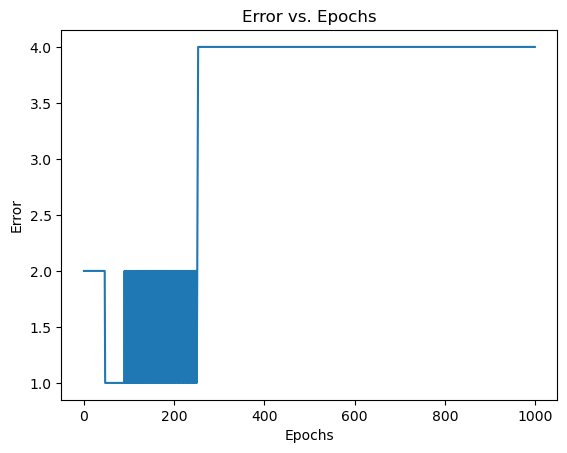

Final Weights (W0, W1, W2): 0.09999999999999236 -0.09999999999999969 -0.09999999999999969


In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize weights and bias
W0 = 10
W1 = 0.2
W2 = -0.75
learning_rate = 0.05

# Define XOR gate input data and expected output
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([0, 1, 1, 0])

# Step activation function
def step_function(x):
    return 1 if x > 0 else 0

# Perceptron training algorithm
def train_perceptron(X, Y, W0, W1, W2, learning_rate, epochs):
    errors = []

    for epoch in range(epochs):
        total_error = 0

        for i in range(len(X)):
            # Calculate the weighted sum
            weighted_sum = W0 + X[i][0] * W1 + X[i][1] * W2

            # Calculate the predicted output using the step function
            prediction = step_function(weighted_sum)

            # Calculate the error
            error = Y[i] - prediction

            # Update weights and bias
            W0 += learning_rate * error
            W1 += learning_rate * error * X[i][0]
            W2 += learning_rate * error * X[i][1]

            total_error += error ** 2

        errors.append(total_error)

        # Check if the error is zero (converged)
        if total_error == 0:
            break

    return W0, W1, W2, errors

# Train the perceptron
epochs = 1000  # You may need to adjust the number of epochs
final_W0, final_W1, final_W2, errors = train_perceptron(X, Y, W0, W1, W2, learning_rate, epochs)

# Plot the errors
plt.plot(range(len(errors)), errors)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Error vs. Epochs')
plt.show()

print("Final Weights (W0, W1, W2):", final_W0, final_W1, final_W2)


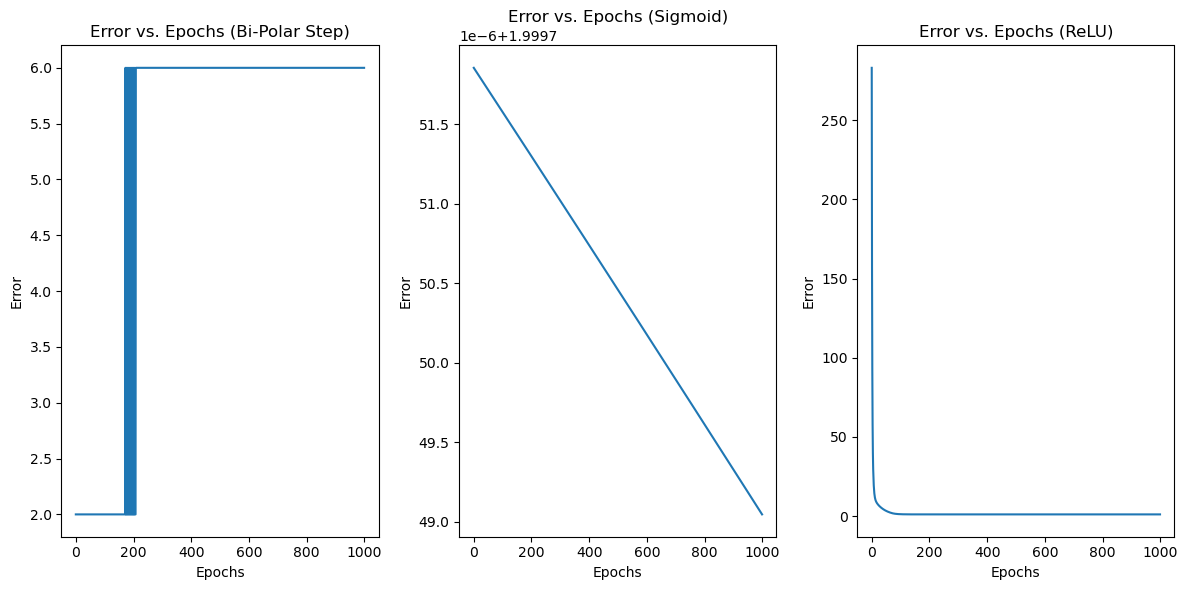

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Define the training data for the XOR gate
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([0, 1, 1, 0])

# Initialize weights and bias
W = np.array([10, 0.2, -0.75])  # W0, W1, W2
learning_rate = 0.05
epochs = 1000

# Initialize lists to store errors and epoch numbers for each activation function
errors_bipolar_step = []
epoch_numbers_bipolar_step = []
errors_sigmoid = []
epoch_numbers_sigmoid = []
errors_relu = []
epoch_numbers_relu = []

# Define the Bi-Polar Step activation function
def bipolar_step_activation(x):
    return 1 if x >= 0 else -1

# Define the Sigmoid activation function
def sigmoid_activation(x):
    return 1 / (1 + np.exp(-x))

# Define the ReLU activation function
def relu_activation(x):
    return max(0, x)

# Training the perceptron with Bi-Polar Step activation
for epoch in range(epochs):
    error = 0
    for i in range(len(X)):
        # Calculate the weighted sum
        weighted_sum = np.dot(X[i], W[1:]) + W[0]

        # Apply the Bi-Polar Step activation function
        prediction = bipolar_step_activation(weighted_sum)

        # Calculate the error
        error = error + (Y[i] - prediction) ** 2

        # Update weights
        W[1:] = W[1:] + learning_rate * (Y[i] - prediction) * X[i]
        W[0] = W[0] + learning_rate * (Y[i] - prediction)

    # Append error and epoch number for plotting
    errors_bipolar_step.append(error)
    epoch_numbers_bipolar_step.append(epoch)

    # Check for convergence
    if error <= 0.002:
        print(f"Converged with Bi-Polar Step after {epoch + 1} epochs")
        break

# Reinitialize weights for Sigmoid and ReLU activation
W = np.array([10, 0.2, -0.75])  # Reset weights

# Training the perceptron with Sigmoid activation
for epoch in range(epochs):
    error = 0
    for i in range(len(X)):
        # Calculate the weighted sum
        weighted_sum = np.dot(X[i], W[1:]) + W[0]

        # Apply the Sigmoid activation function
        prediction = sigmoid_activation(weighted_sum)

        # Calculate the error
        error = error + (Y[i] - prediction) ** 2

        # Update weights
        delta = learning_rate * (Y[i] - prediction) * prediction * (1 - prediction)
        W[1:] = W[1:] + delta * X[i]
        W[0] = W[0] + delta

    # Append error and epoch number for plotting
    errors_sigmoid.append(error)
    epoch_numbers_sigmoid.append(epoch)

    # Check for convergence
    if error <= 0.002:
        print(f"Converged with Sigmoid after {epoch + 1} epochs")
        break

# Reinitialize weights for ReLU activation
W = np.array([10, 0.2, -0.75])  # Reset weights

# Training the perceptron with ReLU activation
for epoch in range(epochs):
    error = 0
    for i in range(len(X)):
        # Calculate the weighted sum
        weighted_sum = np.dot(X[i], W[1:]) + W[0]

        # Apply the ReLU activation function
        prediction = relu_activation(weighted_sum)

        # Calculate the error
        error = error + (Y[i] - prediction) ** 2

        # Update weights
        delta = learning_rate * (Y[i] - prediction)
        W[1:] = W[1:] + delta * X[i]
        W[0] = W[0] + delta

    # Append error and epoch number for plotting
    errors_relu.append(error)
    epoch_numbers_relu.append(epoch)

    # Check for convergence
    if error <= 0.002:
        print(f"Converged with ReLU after {epoch + 1} epochs")
        break

# Plotting error vs. epoch for all activation functions
plt.figure(figsize=(12, 6))
plt.subplot(131)
plt.plot(epoch_numbers_bipolar_step, errors_bipolar_step)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Error vs. Epochs (Bi-Polar Step)')

plt.subplot(132)
plt.plot(epoch_numbers_sigmoid, errors_sigmoid)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Error vs. Epochs (Sigmoid)')

plt.subplot(133)
plt.plot(epoch_numbers_relu, errors_relu)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Error vs. Epochs (ReLU)')

plt.tight_layout()
plt.show()


In [2]:
import numpy as np

# Define the data
data = [
    [20, 6, 2, 386, 1],
    [16, 3, 6, 289, 1],
    [27, 6, 2, 393, 1],
    [19, 1, 2, 110, 0],
    [24, 4, 2, 280, 1],
    [22, 1, 5, 167, 0],
    [15, 4, 2, 271, 1],
    [18, 4, 2, 274, 1],
    [21, 1, 4, 148, 0],
    [16, 2, 4, 198, 0],
]

# Normalize the features
data = np.array(data)
mean = data[:, :-1].mean(axis=0)
std = data[:, :-1].std(axis=0)
data[:, :-1] = (data[:, :-1] - mean) / std

# Initialize weights and bias
np.random.seed(0)
weights = np.random.rand(3)
bias = np.random.rand()

# Define the sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Set the learning rate
learning_rate = 0.01

# Training the perceptron
epochs = 1000
for epoch in range(epochs):
    total_error = 0
    for row in data:
        candies, mangoes, milk_packets, payment, label = row
        z = weights[0] * candies + weights[1] * mangoes + weights[2] * milk_packets + bias
        y_pred = sigmoid(z)
        error = label - y_pred
        weights[0] += learning_rate * error * y_pred * (1 - y_pred) * candies
        weights[1] += learning_rate * error * y_pred * (1 - y_pred) * mangoes
        weights[2] += learning_rate * error * y_pred * (1 - y_pred) * milk_packets
        bias += learning_rate * error * y_pred * (1 - y_pred)
        total_error += error
    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Total Error = {total_error}")

# Classify new transactions
def classify_transaction(candies, mangoes, milk_packets):
    normalized_data = (np.array([candies, mangoes, milk_packets]) - mean[:-1]) / std[:-1]  # Exclude Payment from normalization
    z = np.dot(weights, normalized_data) + bias
    y_pred = sigmoid(z)
    if y_pred >= 0.5:
        return "High Value Tx"
    else:
        return "Low Value Tx"

# Example usage:
new_transaction = (20, 6, 2)
classification = classify_transaction(*new_transaction)
print(f"New Transaction: {new_transaction} => Classification: {classification}")


Epoch 0: Total Error = -0.30804367806712996
Epoch 100: Total Error = 0.06762610533554453
Epoch 200: Total Error = 0.21066656738835343
Epoch 300: Total Error = 0.24953307053084312
Epoch 400: Total Error = 0.2487702423673912
Epoch 500: Total Error = 0.2344215101085918
Epoch 600: Total Error = 0.2165595776978424
Epoch 700: Total Error = 0.19897385032326342
Epoch 800: Total Error = 0.182973983067366
Epoch 900: Total Error = 0.16888766102602493
New Transaction: (20, 6, 2) => Classification: High Value Tx


In [4]:
import numpy as np

# Define the data
data = [
    [20, 6, 2, 386, 1],
    [16, 3, 6, 289, 1],
    [27, 6, 2, 393, 1],
    [19, 1, 2, 110, 0],
    [24, 4, 2, 280, 1],
    [22, 1, 5, 167, 0],
    [15, 4, 2, 271, 1],
    [18, 4, 2, 274, 1],
    [21, 1, 4, 148, 0],
    [16, 2, 4, 198, 0],
]

# Extract features and labels
X = np.array([row[:-1] for row in data])
y = np.array([row[-1] for row in data])

# Add a bias term (constant feature)
X = np.c_[X, np.ones(X.shape[0])]

# Compute the pseudo-inverse
pseudo_inverse = np.linalg.pinv(X)

# Compute the weights using the pseudo-inverse
weights = np.dot(pseudo_inverse, y)

# Define the sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Classify new transactions using the weights
def classify_transaction_pseudo_inverse(candies, mangoes, milk_packets):
    new_data = np.array([candies, mangoes, milk_packets, 1])  # Add a 1 for the bias term
    z = np.dot(new_data, weights[:-1]) + weights[-1]  # Exclude the last element (bias term) from weights
    y_pred = sigmoid(z)
    if y_pred >= 0.5:
        return "High Value Tx"
    else:
        return "Low Value Tx"

# Example usage:
new_transaction = (20, 6, 2)
classification = classify_transaction_pseudo_inverse(*new_transaction)
print(f"Pseudo-Inverse - New Transaction: {new_transaction} => Classification: {classification}")


Pseudo-Inverse - New Transaction: (20, 6, 2) => Classification: Low Value Tx


In [4]:
import numpy as np

# Sigmoid activation and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# AND gate data
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[0],[0],[1]])

# Initialization of weights
v11 = np.random.uniform(size=(2,1))
v12 = np.random.uniform(size=(2,1))
v21 = np.random.uniform(size=(2,1))
v22 = np.random.uniform(size=(2,1))

w1 = np.random.uniform(size=(2,1))
w2 = np.random.uniform(size=(2,1))

learning_rate = 0.05
for iteration in range(1000):
    # Forward propagation
    a_v11 = sigmoid(np.dot(X, v11))
    a_v12 = sigmoid(np.dot(X, v12))
    a_v21 = sigmoid(np.dot(X, v21))
    a_v22 = sigmoid(np.dot(X, v22))
    
    h1_input = np.hstack((a_v11, a_v22))
    h2_input = np.hstack((a_v12, a_v21))
    
    h1 = sigmoid(np.dot(h1_input, w1))
    h2 = sigmoid(np.dot(h2_input, w2))
    
    output = sigmoid(h1 + h2)
    
    # Compute error
    error = y - output
    if np.mean(np.abs(error)) <= 0.002:
        break
    
    # Backpropagation
    d_output = error * sigmoid_derivative(output)
    d_h1 = (d_output * w1[0, 0] + d_output * w2[0, 0]) * sigmoid_derivative(h1)
    d_h2 = (d_output * w1[1, 0] + d_output * w2[1, 0]) * sigmoid_derivative(h2)
    
    # Update weights
    w1 += learning_rate * h1_input.T.dot(d_output)
    w2 += learning_rate * h2_input.T.dot(d_output)
    v11 += learning_rate * X.T.dot(d_h1)
    v12 += learning_rate * X.T.dot(d_h2)
    v21 += learning_rate * X.T.dot(d_h2)
    v22 += learning_rate * X.T.dot(d_h1)

print(output)


[[0.50052031]
 [0.50003982]
 [0.50008255]
 [0.50001061]]


In [5]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# AND gate data
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[0],[0],[1]])

input_size = 2
hidden_size = 2
output_size = 1

# Initialize weights and biases
W1 = np.random.uniform(size=(input_size, hidden_size))
b1 = np.zeros((1, hidden_size))
W2 = np.random.uniform(size=(hidden_size, output_size))
b2 = np.zeros((1, output_size))

learning_rate = 0.05

for iteration in range(10000):
    # Forward propagation
    hidden_layer_input = np.dot(X, W1) + b1
    hidden_layer_output = sigmoid(hidden_layer_input)
    
    output_layer_input = np.dot(hidden_layer_output, W2) + b2
    output = sigmoid(output_layer_input)
    
    # Compute error
    error = y - output
    if np.mean(np.abs(error)) <= 0.002:
        break

    # Backpropagation
    d_output = error * sigmoid_derivative(output)
    error_hidden_layer = d_output.dot(W2.T)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)
    
    # Update weights and biases
    W2 += hidden_layer_output.T.dot(d_output) * learning_rate
    b2 += np.sum(d_output, axis=0, keepdims=True) * learning_rate
    W1 += X.T.dot(d_hidden_layer) * learning_rate
    b1 += np.sum(d_hidden_layer, axis=0, keepdims=True) * learning_rate

print(output)


[[0.0162912 ]
 [0.05937271]
 [0.05883562]
 [0.92490037]]


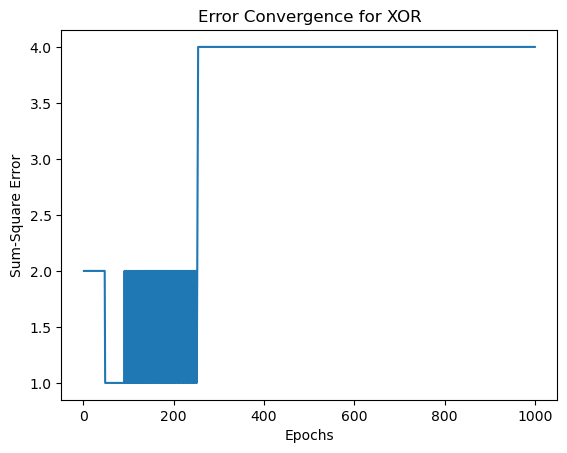

Final Weights: [ 0.1 -0.1 -0.1]


In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Define the XOR gate training data
# Input data (X) and corresponding target labels (Y)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([0, 1, 1, 0])

# Initialize weights and bias
W = np.array([10, 0.2, -0.75])  # Initial weights, including bias
learning_rate = 0.05
epochs = 1000  # Maximum number of epochs
errors = []  # To store the sum-square-error for each epoch

# Step activation function
def step(x):
    return 1 if x > 0 else 0

# Training the perceptron
for epoch in range(epochs):
    error_sum = 0
    for i in range(len(X)):
        # Calculate the predicted output (Y_pred) using the current weights
        Y_pred = step(np.dot(X[i], W[1:]) + W[0])  # Adding bias term
        
        # Calculate the error
        error = Y[i] - Y_pred
        error_sum += error ** 2
        
        # Update weights
        W[1:] += learning_rate * error * X[i]
        W[0] += learning_rate * error  # Update bias
    
    errors.append(error_sum)

    # Check for convergence
    if error_sum == 0:
        print(f"Converged in {epoch + 1} epochs.")
        break

# Plotting the error values
plt.plot(range(1, len(errors) + 1), errors)
plt.xlabel('Epochs')
plt.ylabel('Sum-Square Error')
plt.title('Error Convergence for XOR')
plt.show()

# Print the final weights
print("Final Weights:", W)


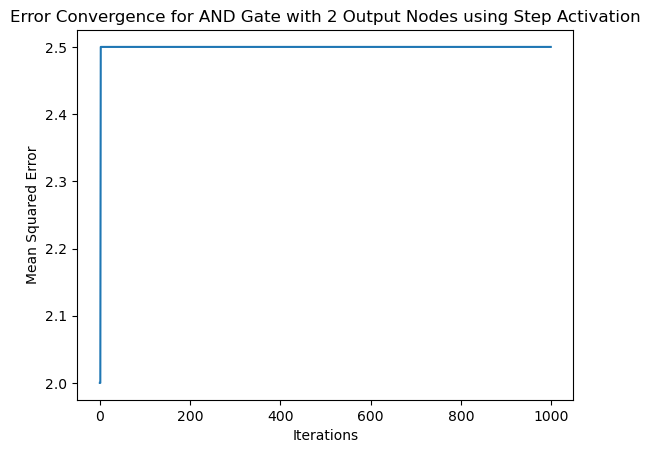

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def step(x):
    return np.where(x > 0, 1, 0)

# AND gate data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[1, 0], [1, 0], [1, 0], [0, 1]])

# Initialization
v11 = np.random.uniform(size=(2, 1))
v12 = np.random.uniform(size=(2, 1))
v21 = np.random.uniform(size=(2, 1))
v22 = np.random.uniform(size=(2, 1))

w11 = np.random.uniform(size=(1, 1))
w12 = np.random.uniform(size=(1, 1))
w21 = np.random.uniform(size=(1, 1))
w22 = np.random.uniform(size=(1, 1))

learning_rate = 0.06
errors = []

for iteration in range(1000):
    total_error = np.zeros(2)
    
    for xi, target in zip(X, y):
        # Forward Propagation
        av11 = step(np.dot(xi, v11))
        av12 = step(np.dot(xi, v12))
        av21 = step(np.dot(xi, v21))
        av22 = step(np.dot(xi, v22))
        
        h1 = (av11 + av21).reshape(-1, 1)  # Reshape
        h2 = (av12 + av22).reshape(-1, 1)  # Reshape
        
        o1 = step(np.dot(h1.T, w11) + np.dot(h2.T, w21))
        o2 = step(np.dot(h1.T, w12) + np.dot(h2.T, w22))
        
        output = np.array([o1, o2]).reshape(2,)
        
        # Compute Error
        error = target - output
        
        total_error += error**2
        
        # Update weights
        w11 += learning_rate * h1 * error[0]
        w12 += learning_rate * h1 * error[1]
        w21 += learning_rate * h2 * error[0]
        w22 += learning_rate * h2 * error[1]
        
        delta = learning_rate * xi.reshape(2, 1)
        v11 += delta * (w11 * error[0] + w12 * error[1])
        v12 += delta * (w11 * error[0] + w12 * error[1])
        v21 += delta * (w21 * error[0] + w22 * error[1])
        v22 += delta * (w21 * error[0] + w22 * error[1])

    errors.append(np.mean(total_error))
    
    if np.all(np.array(total_error) <= 0.002):
        print(f"Converged at iteration {iteration}")
        break

# Plotting
plt.plot(errors)
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.title('Error Convergence for AND Gate with 2 Output Nodes using Step Activation')
plt.show()


In [12]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
import numpy as np

# AND gate data
X_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and = np.array([0, 0, 0, 1])

# XOR gate data
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor = np.array([0, 1, 1, 0])

# Feature Scaling
scaler = StandardScaler()

# Scale AND data
X_and_scaled = scaler.fit_transform(X_and)

# Scale XOR data
X_xor_scaled = scaler.fit_transform(X_xor)

# Train and predict for AND gate
clf_and = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
clf_and.fit(X_and_scaled, y_and)
predictions_and = clf_and.predict(X_and_scaled)
print("AND Predictions:", predictions_and)

# Train and predict for XOR gate
clf_xor = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
clf_xor.fit(X_xor_scaled, y_xor)
predictions_xor = clf_xor.predict(X_xor_scaled)
print("XOR Predictions:", predictions_xor)


AND Predictions: [0 0 0 1]
XOR Predictions: [0 1 1 0]


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the dataset
data_path = "C:\\Users\\maganti akshita\\Downloads\\signal_metrics.csv"
data = pd.read_csv(data_path)

# Convert non-numeric columns to numeric using LabelEncoder
le = LabelEncoder()

for column in data.columns:
    if data[column].dtype == type(object):
        data[column] = le.fit_transform(data[column])

# Define inputs (features) and target
X = data.drop('Network Type', axis=1)
y = data['Network Type']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the MLP classifier
clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(5, 2), max_iter=10000, random_state=1)
clf.fit(X_train_scaled, y_train)

# Predict using the trained model
predictions = clf.predict(X_test_scaled)

# Print the accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(conf_matrix)



Accuracy: 99.97%
Confusion Matrix:
[[842   0   0   0]
 [  0 823   0   0]
 [  0   1 852   0]
 [  0   0   0 848]]
